In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from init_objects import *
from functions.stylizedfacts import *
from functions.helpers import organise_data
from functions.inequality import gini, lorenz_curve
from qe_inequality_model import *
import statsmodels.api as sm
from matplotlib import style
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col
from functions.find_bubbles import *

In [2]:
style.use('ggplot')

# Study model dynamics

## run model

In [29]:
NRUNS = 1
burn_in_period = 0

In [30]:
params = {"fundamental_values": [105, 166], "asset_types": ['stock', 'stock'],
              "trader_sample_size": 10, "n_traders": 500,
              "ticks": 400, "std_fundamentals": [0.05, 0.01],
              "std_noise": 0.10696588473846724, "w_random": 0.1,
              "strat_share_chartists": 0.0,
              "init_assets": [50, 50], "base_risk_aversion": 1.0,
              'spread_max': 0.004087, "horizon": 200,
              "fundamentalist_horizon_multiplier": 0.2,
              "trades_per_tick": 3, "mutation_intensity": 0.05,
              "average_learning_ability": 0.5,
              "bond_mean_reversion": 0.00,
              "qe_perc_size": 0.0, "qe_start": 100, "qe_end": 110, "qe_asset_index": 0}

In [31]:
trdrs = []
orbs = []
central_banks = []
for seed in range(NRUNS): 
    traders, central_bank, orderbook = init_objects_qe_ineq(params, seed)
    traders, central_bank, orderbook = qe_ineq_model(traders, central_bank, orderbook, params, seed)
    central_banks.append(central_bank)
    trdrs.append(traders)
    orbs.append(orderbook)

Start of simulation  0
QE TIME =  100
QE TIME =  100
QE TIME =  100
QE TIME =  101
QE TIME =  101
QE TIME =  101
QE TIME =  102
QE TIME =  102
QE TIME =  102
QE TIME =  103
QE TIME =  103
QE TIME =  103
QE TIME =  104
QE TIME =  104
QE TIME =  104
QE TIME =  105
QE TIME =  105
QE TIME =  105
QE TIME =  106
QE TIME =  106
QE TIME =  106
QE TIME =  107
QE TIME =  107
QE TIME =  107
QE TIME =  108
QE TIME =  108
QE TIME =  108
QE TIME =  109
QE TIME =  109
QE TIME =  109


# Plot prices 

1. Bonds
2. Stocks

In [32]:
np.mean(orbs[0][1].tick_close_price)

167.02639026989505

In [33]:
np.mean(orbs[0][1].tick_close_price)

167.02639026989505

Text(0, 0.5, 'Asset 1')

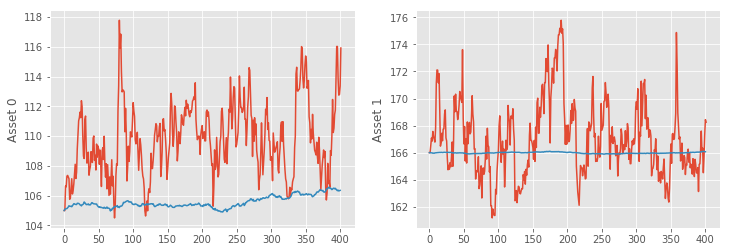

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(range(len(orbs[0][0].tick_close_price)), orbs[0][0].tick_close_price, label='price')
ax1.plot(range(len(orbs[0][0].fundamental)), orbs[0][0].fundamental, label='fundamental')

ax1.set_ylabel('Asset 0', fontsize='12')

ax2.plot(range(len(orbs[0][1].tick_close_price)), orbs[0][1].tick_close_price, label='price')
ax2.plot(range(len(orbs[0][1].fundamental)), orbs[0][1].fundamental, label='fundamental')
ax2.set_ylabel('Asset 1', fontsize='12')

## Plot balance sheet of CB 

Text(0, 0.5, 'Asset 0')

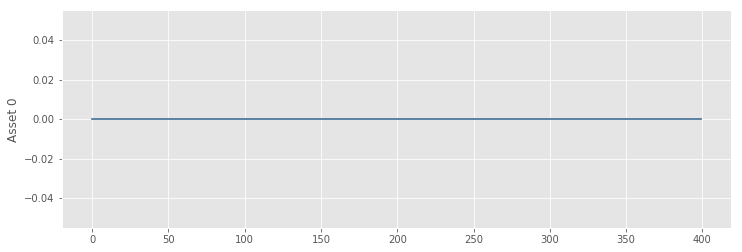

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,4))

cb_asset_value = np.array(orbs[0][params["qe_asset_index"]].tick_close_price[2:]) * np.array(central_bank.var.assets[params["qe_asset_index"]])

ax1.plot(range(len(cb_asset_value)), cb_asset_value, label='assets')
ax1.plot(range(len(cb_asset_value)), central_bank.var.currency, label='currency')

ax1.set_ylabel('Asset 0', fontsize='12')